In [186]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [189]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [190]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


we can see that happiness score varies between 2.83 to 7.58

So the columns needed to make prediction is 'Economy(GDP per Capita)','Family','Health(Life Expectancy)','Freedom','Trust(Government Corruption)','Generosity'.
Here 'Standard Error' does not contribute more for prediction so we can drop this column. 'Dystopia Residual' is related to unexplained value for each country so we may think to drop this column.

In [191]:
df.drop(['Region','Standard Error','Dystopia Residual'],axis=1,inplace=True)

In [192]:
df.head(5)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# Correlation

In [193]:
df.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Economy (GDP per Capita),-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


<AxesSubplot:>

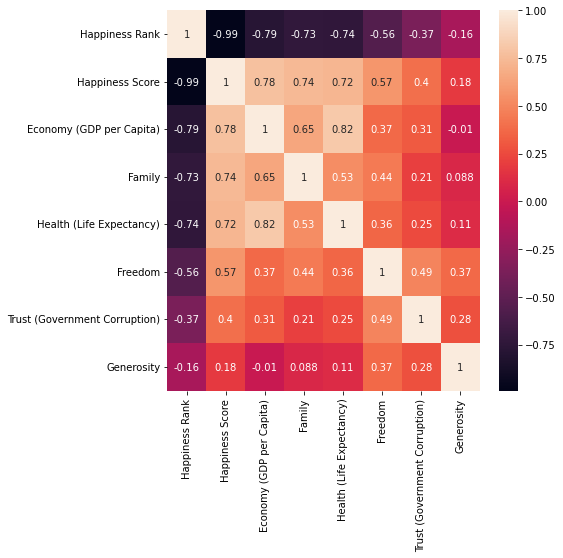

In [194]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

Outcome of EDA:
1.Economy(GDP per capita) has 78 correlation with target colum which is very good bond
2.Family has 74 correlation with target column which is very good bond
3.Health(Life Expectancy) has 72 with target column which is very good bond
4.Freedom has 57 with target column which is good bond
5.Trust(Government Corruption) has 40 with target column which is good bond
6.Generosity has 18 correlation is also doing well with target column

In this also we can drop 'Country' and 'Happiness Rank' column as it has nothing to do with happiness score.
As 'Happiness Score' is our target column we can make it assign to variable y

In [195]:
df.drop(['Country','Happiness Rank'],axis=1,inplace=True)

In [196]:
df.head(5)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [202]:
x = df.iloc[:,1:]

In [200]:
y = df.iloc[:,0]

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

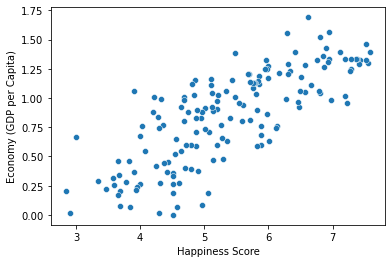

In [248]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

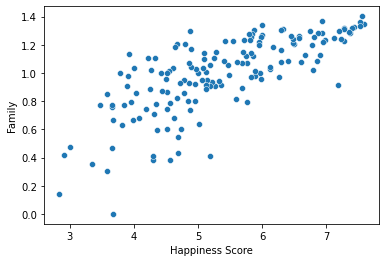

In [249]:
sns.scatterplot(x='Happiness Score',y='Family',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

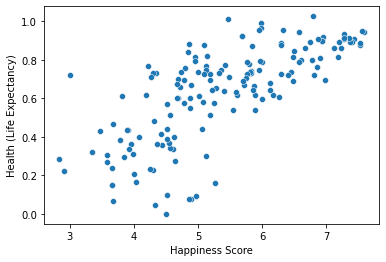

In [250]:
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

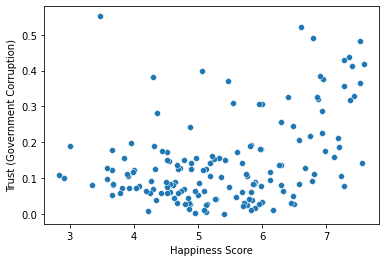

In [251]:
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Freedom'>

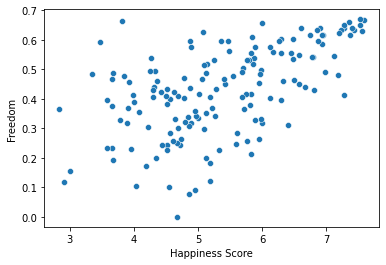

In [252]:
sns.scatterplot(x='Happiness Score',y='Freedom',data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

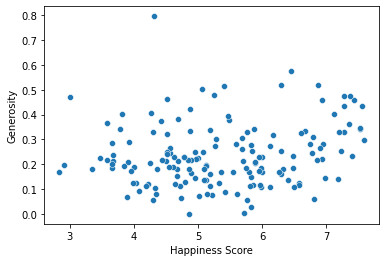

In [253]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=df)

By scatter plot we can conclude that Happiness Score is directly proportional to 'Health (Life Expectancy)','Economy (GDP per capita)','Family','Freedom' and are highly correlated with happiness score. 'Trust' and 'Generosity' is also having good correlation with Happiness Score.

# Outliers Checking:

Happiness Score                     AxesSubplot(0.125,0.536818;0.168478x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Family                           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Health (Life Expectancy)         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.168478x0.343182)
Trust (Government Corruption)       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Generosity                          AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

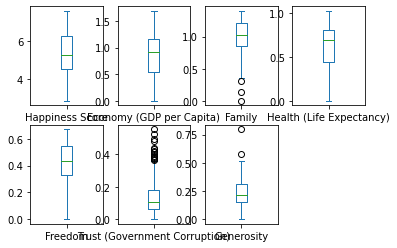

In [209]:
df.plot(kind='box',subplots=True,layout=(2,4))

By this we can visualize that outliers may be present in 'Family' and 'Trust(Government Corruption)' column

In [210]:
df.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
dtype: float64

outcome of skewness: Skewness threshold is taken +/- 0.65.
Columns which have skewness are:

Family
Health(Life Expectancy)
Trust(Government Corruption)
Generosity

# Normal Distribution Curve:

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

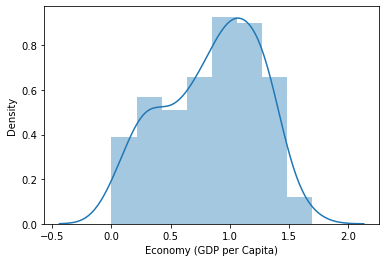

In [211]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

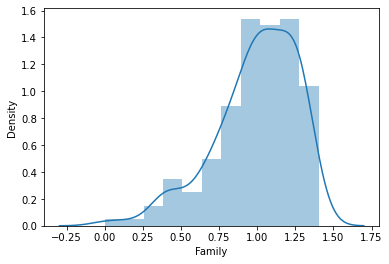

In [212]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

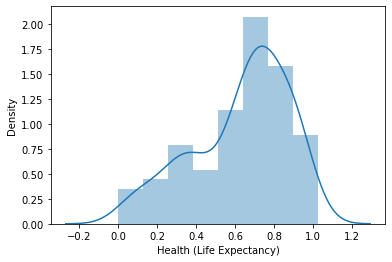

In [213]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

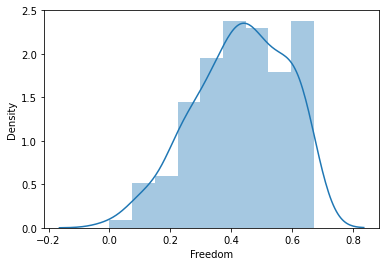

In [214]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

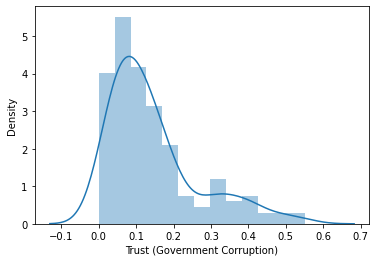

In [216]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

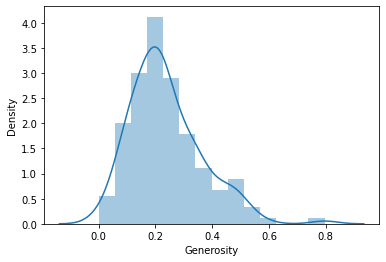

In [217]:
sns.distplot(df['Generosity'])

The normal distribution shows that the data is skewed

Now we will remove outliers that are present

In [218]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z.shape

(158, 7)

In [219]:
threshold = 3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 157], dtype=int64), array([5, 6, 2, 5, 2], dtype=int64))


In [221]:
len(np.where(z>3)[0])

5

In [223]:
df_new = df[(z<3).all(axis=1)]
print("Old DataFrame ",df.shape)
print("New DataFrame ",df_new.shape)
print("Total dropped rows ",df.shape[0] - df_new.shape[0])

Old DataFrame  (158, 7)
New DataFrame  (153, 7)
Total dropped rows  5


# Percentage of Data Loss

In [224]:
loss_percent = (158-153)/158*100
print(loss_percent,'%')

3.1645569620253164 %


# Transforming Data to Remove Skewness

In [226]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 1.44606101e+00,  1.66920633e+00,  1.49176450e+00,
         1.75633466e+00,  1.77399061e+00,  6.22390513e-01],
       [ 1.17332111e+00,  2.01213244e+00,  1.53234847e+00,
         1.43994643e+00,  3.15993256e-01,  1.48099498e+00],
       [ 1.23983557e+00,  1.73958573e+00,  1.08522306e+00,
         1.61573320e+00,  1.90679207e+00,  9.27972764e-01],
       [ 1.63024551e+00,  1.55311811e+00,  1.14759962e+00,
         1.79282102e+00,  1.62400701e+00,  9.64080261e-01],
       [ 1.24216835e+00,  1.50172605e+00,  1.27017856e+00,
         1.47547945e+00,  1.50348412e+00,  1.59222419e+00],
       [ 1.13879938e+00,  1.47510960e+00,  1.17079907e+00,
         1.54972572e+00,  1.75923250e+00,  1.27130119e-01],
       [ 1.25124447e+00,  1.24751108e+00,  1.19308059e+00,
         1.33081553e+00,  1.45991648e+00,  1.68007190e+00],
       [ 1.25778915e+00,  1.29981977e+00,  1.30207755e+00,
         1.70597065e+00,  1.81691406e+00,  1.06237761e+00],
       [ 1.02489910e+00,  1.48372286e+00,  1.286

In [227]:
pd.DataFrame(x).skew()

0   -0.127233
1   -0.169651
2   -0.183181
3   -0.080728
4    0.185965
5    0.013320
dtype: float64

we use standard scalar to make mean = 0 and std = 1

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.44606101e+00,  1.66920633e+00,  1.49176450e+00,
         1.75633466e+00,  1.77399061e+00,  6.22390513e-01],
       [ 1.17332111e+00,  2.01213244e+00,  1.53234847e+00,
         1.43994643e+00,  3.15993256e-01,  1.48099498e+00],
       [ 1.23983557e+00,  1.73958573e+00,  1.08522306e+00,
         1.61573320e+00,  1.90679207e+00,  9.27972764e-01],
       [ 1.63024551e+00,  1.55311811e+00,  1.14759962e+00,
         1.79282102e+00,  1.62400701e+00,  9.64080261e-01],
       [ 1.24216835e+00,  1.50172605e+00,  1.27017856e+00,
         1.47547945e+00,  1.50348412e+00,  1.59222419e+00],
       [ 1.13879938e+00,  1.47510960e+00,  1.17079907e+00,
         1.54972572e+00,  1.75923250e+00,  1.27130119e-01],
       [ 1.25124447e+00,  1.24751108e+00,  1.19308059e+00,
         1.33081553e+00,  1.45991648e+00,  1.68007190e+00],
       [ 1.25778915e+00,  1.29981977e+00,  1.30207755e+00,
         1.70597065e+00,  1.81691406e+00,  1.06237761e+00],
       [ 1.02489910e+00,  1.48372286e+00,  1.286

Since happiness score is  continuoes data we go for Linear Regression 

In [229]:
x.shape 

(158, 6)

In [230]:
y.shape

(158,)

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=7)

In [235]:
x_train.shape

(126, 6)

In [236]:
x_test.shape

(32, 6)

In [237]:
y_train.shape

(126,)

In [238]:
y_test.shape

(32,)

In [239]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [240]:
lm.score(x_train,y_train)

0.8028086441458885

In [241]:
lm.coef_

array([0.31235806, 0.44375752, 0.24114223, 0.1518511 , 0.10398387,
       0.03287348])

In [243]:
lm.intercept_

5.35366806542057

In [244]:
pred = lm.predict(x_test)
pred

array([3.70336625, 5.07206185, 5.72540364, 3.93125597, 4.74126114,
       5.19402432, 5.5207358 , 3.88175016, 3.85320183, 5.74435246,
       4.63606418, 4.77688382, 5.55476343, 6.11265179, 4.25849845,
       3.48868929, 5.54173193, 6.33717276, 4.77485764, 6.10040868,
       4.4427791 , 5.88285452, 4.76007809, 4.97570524, 6.74789127,
       4.370782  , 5.52102388, 4.49948557, 4.76755875, 5.87190518,
       5.05866401, 6.71569131])

In [245]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

0.32454900037965423


# Conclusion:

In [246]:
a = np.array(y_test)
predicted = np.array(lm.predict(x_test))
df_predicted = pd.DataFrame({'original':a,'predicted':predicted})
df_predicted

,original,predicted
0,3.656,3.703366
1,5.123,5.072062
2,5.716,5.725404
3,5.194,3.931256
4,4.715,4.741261
5,5.360,5.194024
6,5.098,5.520736
7,4.571,3.881750
8,3.681,3.853202
9,5.754,5.744352


Here the predicted score and the original score is almost similar, as accuracy score is 80%